# 2.1

## Error-correlation
$\Delta w_{kj}(n) = \eta e_k(n)x_j(n)$

$\Delta w_{kj}(n) = $ change of weights

$\eta = $ rate of learning

$e_k(n) = d_k(n) - y_k(n) = $ error between desired and actual output of net

$x_j(n) = $ input signal

* Error-correction learning
* Delta of synptic weights is proportional to the product of the error signal and the input signal
* Uses learning rate parameter
* Minimization of a cost function: $\theta(n) = \frac{1}{2}*e_{k}^2(n)$
* Assumption error signal is directly measurable
* That means supply of desired response

## Hebbian
$\Delta w_{kj}(n) = \eta y_k(n)x_j(n)$

$\Delta w_{kj}(n) = $ change of weights

$\eta = $ rate of learning

$y_k(n) = $ output signal

$x_j(n) = $ input signal

* Two-part rule:
    1. if two neurons are activated synchronously, then the strength of their connection is increased
	2. if two neurons are activated asynchronously, then the strength of their connection is weakend.
* Time-dependent mechanism: modification of a synapse depends on the time of occurence of the pre-  and postsynaptic signals
* Local mechanism: information bearing signals are in spatiotemporal contiguity
* Interactive mechansim: depends on interaction between pre and post synaptic signals
* Conjunctional or correlation mechanism: correlation over time between pre- and postsynaptic  signals $\rightarrow$ synaptic change

## Differences
- Hebbian is unsupervised (no desired data) while error-correlation is supervised learning
- In Hebbian learning the weights are increased if input and output are high, in error-correlcation the error counts

# 2.10

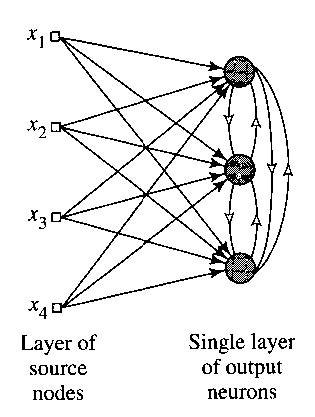

In [1]:
from IPython.display import Image
Image("fig_2_4.png")

$y_1 = \varphi(x_1 * w_{11} + x_2 * w_{21} + x_3 * w_{31} + x_4 * w_{41})$

$y_2 = \varphi(x_1 * w_{12} + x_2 * w_{22} + x_3 * w_{32} + x_4 * w_{42})$

$y_3 = \varphi(x_1 * w_{13} + x_2 * w_{23} + x_3 * w_{33} + x_4 * w_{43})$

$o_1 = y_1 + c_{21} * y_2 + c_{31} * y_3$

$o_2 = c_{12} * y_1 + y_2 + c_{32} * y_3$

$o_3 = c_{31} * y_1 + c_{23} * y_2 + y_3$

$C = 
\begin{bmatrix}
1 & -\epsilon & -\epsilon\\
-\epsilon & 1 & -\epsilon\\
-\epsilon & -\epsilon & 1
\end{bmatrix}
$

Repeat $o_k$ until it is 0 or all other neurons are 0.
The neuron wins if it has the largest $y_k$.

# Homework_3_5

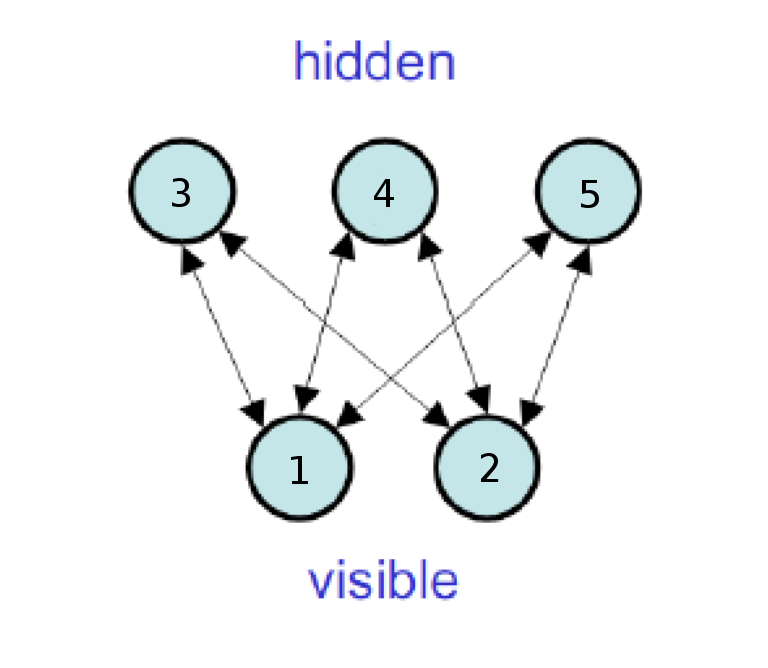

In [2]:
from IPython.display import Image
Image("boltzmann.png")

In [184]:
import numpy as np

In [185]:
def energy(weights, neurons):
    e = 0
    for j in range(5):
        for k in range(5):
            e = e + weights[j, k] * neurons[j] * neurons[k]
    return -0.5 * e

In [186]:
def prob(weights, neurons, t, k):
    flipped_neurons = np.array(neurons)
    flipped_neurons[k] = 1 - neurons[k]
    return 1. / (1 + np.exp(-(energy(weights, neurons) - energy(weights, flipped_neurons)) / t))

In [199]:
def corr(weights, neurons, clamped, t, k, j):
    tmp_neurons = np.array(neurons)
    if clamped:
        r = range(2, 5)
    else:
        r = range(5)
    for i in r:
        if prob(weights, neurons, t, i) < 0.5:
            tmp_neurons[i] = 1 - tmp_neurons[i]
            
    #print("neurons", neurons)
    #print("flipped neurons", tmp_neurons)
            
    return tmp_neurons[k] - tmp_neurons[j]
    
    #if tmp_neurons[k] is tmp_neurons[j]:
    #    return 1
    #else:
    #    return 0

In [200]:
def update_weights(weights, neurons, temp):
    new_weights = np.array(weights)
    for k in range(2):
        for j in range(2, 5):
            d_corr = corr(weights, neurons, True, temp, j, k) - corr(weights, neurons, False, temp, j, k)
            new_weights[j, k] = weights[j, k] + learning_rate * d_corr
            print(k, j, d_corr)
    return new_weights

In [201]:
learning_rate = 0.5
temp = 100
training = np.array([[0, 1],
                     [1, 0]])

weights = np.zeros((5, 5))
for x in range(2):
    for y in range(2, 5):
        weights[y, x] = np.random.rand()
        
for y in range(2):
    for x in range(2, 5):
        weights[y, x] = np.random.rand()

neurons = np.round(np.random.rand(1, 5))[0]


print(weights)

for i in range(np.size(training, 0)):
    neurons[0:2] = training[i,:]
    print(neurons)
    print("apply training", training[i,:])
    #neurons = np.round(np.dot(weights, neurons))
    neurons[np.where(neurons > 1)] = 1
    neurons[np.where(neurons < 0)] = 0
    weights = update_weights(weights, neurons, temp)
    print(weights)




[[ 0.          0.          0.69443061  0.97221437  0.15022974]
 [ 0.          0.          0.28621113  0.22708515  0.11615229]
 [ 0.26596381  0.08691293  0.          0.          0.        ]
 [ 0.52096107  0.30401276  0.          0.          0.        ]
 [ 0.4065564   0.89160831  0.          0.          0.        ]]
[ 0.  1.  0.  0.  1.]
apply training [0 1]
0 2 0.0
0 3 0.0
0 4 0.0
1 2 -1.0
1 3 -1.0
1 4 -1.0
[[ 0.          0.          0.69443061  0.97221437  0.15022974]
 [ 0.          0.          0.28621113  0.22708515  0.11615229]
 [ 0.26596381 -0.41308707  0.          0.          0.        ]
 [ 0.52096107 -0.19598724  0.          0.          0.        ]
 [ 0.4065564   0.39160831  0.          0.          0.        ]]
[ 1.  0.  0.  0.  1.]
apply training [1 0]
0 2 -1.0
0 3 -1.0
0 4 -1.0
1 2 0.0
1 3 0.0
1 4 0.0
[[ 0.          0.          0.69443061  0.97221437  0.15022974]
 [ 0.          0.          0.28621113  0.22708515  0.11615229]
 [-0.23403619 -0.41308707  0.          0.          0. 

In [194]:
weights

array([[ 0.        ,  0.        ,  0.47414103,  0.19752314,  0.88871466],
       [ 0.        ,  0.        ,  0.49801222,  0.55284361,  0.98262662],
       [-0.35274805, -0.175488  ,  0.        ,  0.        ,  0.        ],
       [ 0.05882694, -0.36928879,  0.        ,  0.        ,  0.        ],
       [ 0.23419213, -0.06086278,  0.        ,  0.        ,  0.        ]])

In [195]:
neurons

array([ 1.,  0.,  0.,  0.,  1.])

In [173]:
np.round(np.dot(weights, neurons))

array([ 1.,  0.,  0.,  1.,  1.])

In [169]:
np.identity?